In [1]:
import pandas as pd
import pandas_datareader as pdr

In [2]:
ts = pdr.av.time_series.AVTimeSeriesReader('EURUSD', api_key='your_api_key')
df = ts.read()
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [3]:
df = df.drop('volume', axis=1)

In [4]:
split_date = '2023-07-31'
df_for_learning = df[df.index <= split_date].copy()
df_for_checking = df[df.index > split_date].copy()

In [5]:
df_for_learning['body'] = (df_for_learning['open'] - df_for_learning['close']).abs()
df_for_learning['shadow'] = df_for_learning['high'] - df_for_learning['low']
df_for_learning['bull_or_bear'] = (df_for_learning['open'] < df_for_learning['close']).astype(int) * 2 - 1

df_for_learning['prediction'] = df_for_learning['close'].shift(-1)
df_for_learning = df_for_learning.iloc[:-1]

In [6]:
df_for_learning

,open,high,low,close,body,shadow,bull_or_bear,prediction
2004-07-07,1.2303,1.2389,1.2270,1.2366,0.0063,0.0119,1,1.2389
2004-07-08,1.2366,1.2405,1.2336,1.2389,0.0023,0.0069,1,1.2410
2004-07-09,1.2388,1.2424,1.2367,1.2410,0.0022,0.0057,1,1.2401
2004-07-12,1.2410,1.2436,1.2384,1.2401,0.0009,0.0052,-1,1.2332
2004-07-13,1.2326,1.2412,1.2295,1.2332,0.0006,0.0117,1,1.2381
...,...,...,...,...,...,...,...,...
2023-07-24,1.1131,1.1147,1.1060,1.1063,0.0068,0.0087,-1,1.1057
2023-07-25,1.1062,1.1087,1.1020,1.1057,0.0005,0.0067,-1,1.1087
2023-07-26,1.1057,1.1107,1.1038,1.1087,0.0030,0.0069,1,1.0976
2023-07-27,1.1087,1.1150,1.0964,1.0976,0.0111,0.0186,-1,1.1015


In [7]:
df_for_checking['body'] = (df_for_checking['open'] - df_for_checking['close']).abs()
df_for_checking['shadow'] = df_for_checking['high'] - df_for_checking['low']
df_for_checking['bull_or_bear'] = (df_for_checking['open'] < df_for_checking['close']).astype(int) * 2 - 1

In [8]:
df_for_checking

,open,high,low,close,body,shadow,bull_or_bear
2023-08-01,1.0997,1.1019,1.0951,1.1018,0.0021,0.0068,1
2023-08-02,1.1018,1.1018,1.0917,1.0938,0.0080,0.0101,-1
2023-08-03,1.0938,1.0963,1.0911,1.0948,0.0010,0.0052,1
2023-08-04,1.0947,1.1042,1.0934,1.1007,0.0060,0.0108,1
2023-08-07,1.1011,1.1014,1.0964,1.1003,0.0008,0.0050,-1
2023-08-08,1.1003,1.1011,1.0928,1.0954,0.0049,0.0083,-1
2023-08-09,1.0954,1.0995,1.0950,1.0976,0.0022,0.0045,1
2023-08-10,1.0976,1.1065,1.0966,1.0980,0.0004,0.0099,1
2023-08-11,1.0983,1.1005,1.0942,1.0944,0.0039,0.0063,-1
2023-08-14,1.0947,1.0960,1.0875,1.0905,0.0042,0.0085,-1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_for_learning[['open', 'body', 'shadow', 'bull_or_bear']]
Y = df_for_learning['prediction']

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, shuffle=False, train_size=0.8)

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [13]:
modelMLP = MLPRegressor()

param_dist = {
    'hidden_layer_sizes': [(16,), (32,), (64,)],
    'activation': ['relu', 'tanh'],
    'alpha': uniform(0.0001, 0.1), 
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

random_search = RandomizedSearchCV(modelMLP, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(X_train, Y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

best_modelMLP = random_search.best_estimator_

test_score = best_modelMLP.score(X_test, Y_test)
print("Test Score: ", test_score)

Best Parameters:  {'activation': 'relu', 'alpha': 0.08671761457749352, 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'max_iter': 500}
Best Score:  0.6426482684125446
Test Score:  0.96261886146418


In [14]:
def format_to_4_decimals(value):
    return round(value, 4)

df_for_checking['checking_prediction'] = best_modelMLP.predict(df_for_checking[['open', 'body', 'shadow', 'bull_or_bear']])
df_for_checking['checking_prediction'] = df_for_checking['checking_prediction'].shift(1)
df_for_checking['checking_prediction'] = df_for_checking['checking_prediction'].apply(format_to_4_decimals)

df_for_checking['checking_prediction'] = df_for_checking['checking_prediction'].fillna(df_for_checking['close'])

In [15]:
df_for_checking

,open,high,low,close,body,shadow,bull_or_bear,checking_prediction
2023-08-01,1.0997,1.1019,1.0951,1.1018,0.0021,0.0068,1,1.1018
2023-08-02,1.1018,1.1018,1.0917,1.0938,0.0080,0.0101,-1,1.1152
2023-08-03,1.0938,1.0963,1.0911,1.0948,0.0010,0.0052,1,1.1079
2023-08-04,1.0947,1.1042,1.0934,1.1007,0.0060,0.0108,1,1.1095
2023-08-07,1.1011,1.1014,1.0964,1.1003,0.0008,0.0050,-1,1.1110
2023-08-08,1.1003,1.1011,1.0928,1.0954,0.0049,0.0083,-1,1.1062
2023-08-09,1.0954,1.0995,1.0950,1.0976,0.0022,0.0045,1,1.1061
2023-08-10,1.0976,1.1065,1.0966,1.0980,0.0004,0.0099,1,1.1111
2023-08-11,1.0983,1.1005,1.0942,1.0944,0.0039,0.0063,-1,1.1131
2023-08-14,1.0947,1.0960,1.0875,1.0905,0.0042,0.0085,-1,1.1040


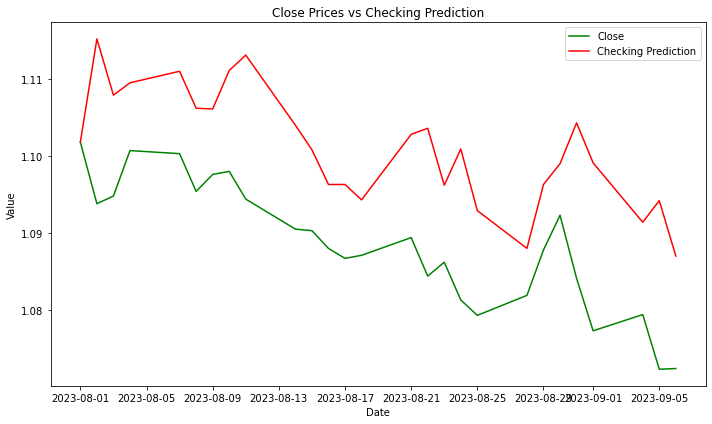

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_for_checking.index, df_for_checking['close'], label='Close', color='green')

plt.plot(df_for_checking.index, df_for_checking['checking_prediction'], label='Checking Prediction', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Close Prices vs Checking Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
initial_investment = 10000

df_for_checking['units'] = initial_investment / df_for_checking['checking_prediction']
df_for_checking['value_change'] = df_for_checking['units'] * (df_for_checking['close'] - df_for_checking['checking_prediction'])
total_value_change = df_for_checking['value_change'].sum()
overall_balance = initial_investment + total_value_change

print("Initial Investment: {:.2f}".format(initial_investment))
print("Total Value Change: {:.2f}".format(total_value_change))
print("Overall Balance: {:.2f}".format(overall_balance))

Initial Investment: 10000.00
Total Value Change: -3102.30
Overall Balance: 6897.70
